In [2]:
"""
Author: JiaHui (Jeffrey) Lu
ID: 25944800
"""
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
def my_log1p(x):
    """
    The function takes in x value then uses taylor expansion formula to generate the value for log1p
    :param x: the input to the function log(1+x)
    :return: ans: the result of log1p with input x.
             n: the number of iteration used to obtain a convergent result
    """
    n = 2
    ans = x
    start = time.time()
    while True:
        delta = (((-1)**(n+1))*(x**n))/n
        ans += delta
        if n >= 1000000 or abs(delta) < 0.000001:
            break
        n += 1
    end = time.time()
    my_runtime = end - start

    # compute the error and run time.
    start = time.time()
    inbuilt = np.log(1+x)
    end = time.time()
    inbuilt_runtime = end - start
    
    start = time.time()
    actual = np.log1p(x)
    end = time.time()
    actual_runtime = end - start
    error = abs((ans - actual)/actual)
    inbuilt_error = abs((inbuilt - actual)/actual)

    # Return value as required
    return ans, n, error, inbuilt_error, my_runtime, inbuilt_runtime, actual_runtime

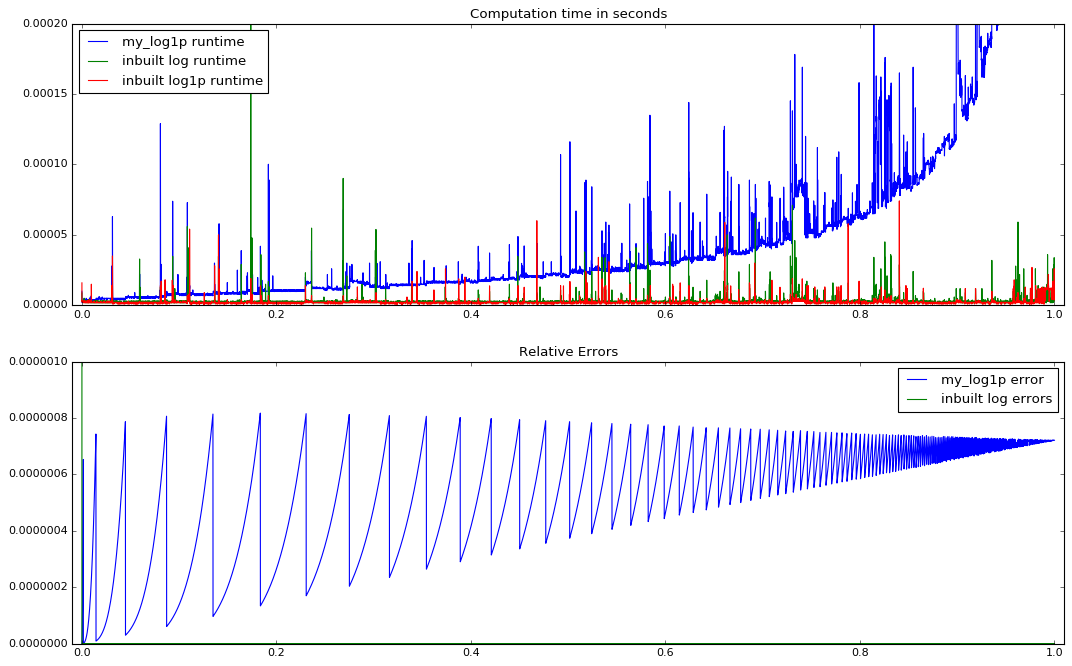

In [5]:
# Generate test values
# Using values that were significantly smaller than machine eps.
small_vals = np.array([2.220446049250313e-50,2.220446049250313e-20, 2.220446049250313e-16])
# add in values from 0 to 1
tmp = np.linspace(0, 1, 10000)
test_val = np.concatenate([small_vals, tmp[1:]])

my_runtime, inbuilt_runtime, actual_runtime = [], [], []
my_errors = []
inbuilt_errors = []
for test_item in test_val:
    _, __, my_error, inbuilt_error, mine, inbuilt, actual = my_log1p(test_item)
    my_runtime.append(mine)
    inbuilt_runtime.append(inbuilt)
    actual_runtime.append(actual)
    my_errors.append(my_error)
    inbuilt_errors.append(inbuilt_error)
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2,1,1)
plt.xlim((-0.01, 1.01))
plt.ylim((0, 0.0002))
plt.plot(test_val, my_runtime, label="my_log1p runtime")
plt.plot(test_val, inbuilt_runtime, label="inbuilt log runtime")
plt.plot(test_val, actual_runtime, label="inbuilt log1p runtime")
# plt.plot(test_val, inbuilt_runtime)
plt.legend(loc=2)
plt.title("Computation time in seconds")

plt.subplot(2,1,2)
plt.ylim((0,0.000001))
plt.xlim((-0.01, 1.01))
plt.plot(test_val, my_errors, label="my_log1p error")
plt.plot(test_val, inbuilt_errors, label="inbuilt log errors")
plt.legend(loc=1)
plt.title("Relative Errors")
plt.show()

In [6]:
"""
When the value is smaller than machine epsilon, the conversion from x to y requires the computation of 2+x. Now when x 
is smaller or equal to machine epsilon, the computation of 2+x results in value of 2. This causes a problem, as the y
value will be 0. Consequently, the following calculations requires multiplication involving y, as y = 0, the answer returned
would be 0. Resulting in a 100% relative error.
"""

def my_another_log1p(x):
    y = 1-2/(2+x)
    n = 2
    ans = 2*y
    while True:
        delta = 2*(y**(2*n-1))/(2*n-1)
        ans += delta
        if n >= 1000000 or abs(delta) < 0.000001:
            break
        n += 1
        # print(delta)
    actual = np.log1p(x)
    error = abs((ans - actual)/actual)
    return ans, n, error

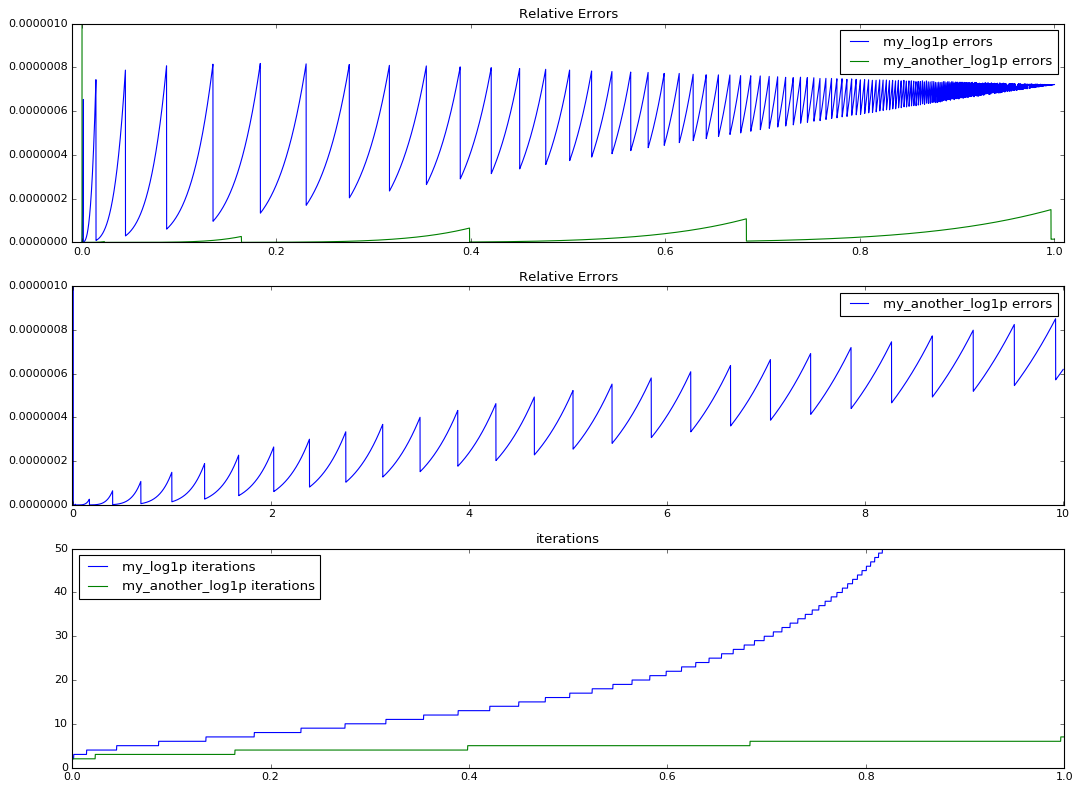

In [7]:
# Generate test values
small_vals = np.array([2.220446049250313e-50, 2.220446049250313e-16])
tmp = np.linspace(0, 2, 10000)
test_val = np.concatenate([small_vals, tmp[1:]])
# Generate test values
# Using values that were significantly smaller than machine eps.
small_vals = np.array([2.220446049250313e-50,2.220446049250313e-20, 2.220446049250313e-16])
# add in values from 0 to 1
tmp = np.linspace(0, 1, 10000)
test_val = np.concatenate([small_vals, tmp[1:]])

my_errors = []
other_errors = []
my_ns, other_ns = [], []
for test_item in test_val:
    _, my_n, my_error, inbuilt_error, mine, inbuilt, actual = my_log1p(test_item)
    ___, other_n, other_error = my_another_log1p(test_item)
    my_errors.append(my_error)
    other_errors.append(other_error)
    my_ns.append(my_n)
    other_ns.append(other_n)


fig=plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(3,1,1)
plt.ylim((0,0.000001))
plt.xlim((-0.01, 1.01))
plt.plot(test_val, my_errors, label="my_log1p errors")
plt.plot(test_val, other_errors, label="my_another_log1p errors")
plt.legend(loc=1)
plt.title("Relative Errors")


plt.subplot(3,1,3)
plt.ylim((0, 50))
plt.plot(test_val, my_ns, label="my_log1p iterations")
plt.plot(test_val, other_ns, label="my_another_log1p iterations")
plt.legend(loc=2)
plt.title("iterations")


plt.subplot(3,1,2)

small_vals = np.array([2.220446049250313e-50,2.220446049250313e-20, 2.220446049250313e-16])
# add in values from 0 to 1
tmp = np.linspace(0, 10, 10000)
test_val = np.concatenate([small_vals, tmp[1:]])
other_errors = []
for test_item in test_val:
    _,__, other_error = my_another_log1p(test_item)
    other_errors.append(other_error)
plt.ylim((0,0.000001))
plt.xlim((-0.01, 10.01))
plt.plot(test_val, other_errors, label="my_another_log1p errors")
plt.legend(loc=1)
plt.title("Relative Errors")
plt.show()

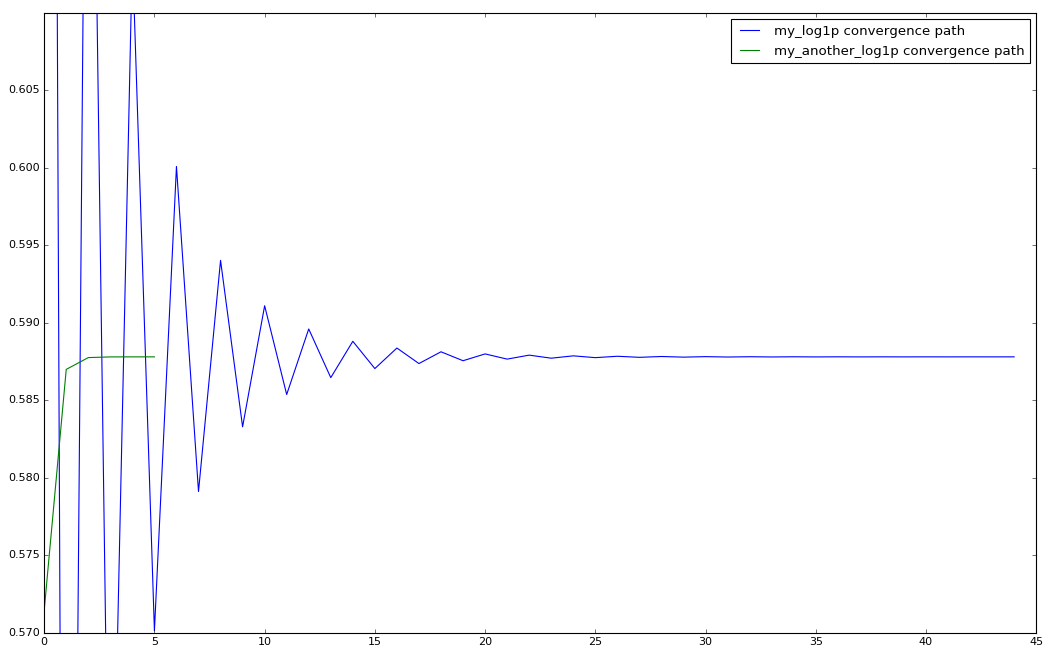

In [17]:
"""
Let's see how the two implementations converge to the final value for a fixed value x = 0.8
"""
x = 0.8

# generate a list of values on how the first method converges
n = 2
ans1 = x
ans1_list = [ans1]
start = time.time()
while True:
    delta = (((-1)**(n+1))*(x**n))/n
    ans1 += delta
    ans1_list.append(ans1)
    if n >= 1000000 or abs(delta) < 0.000001:
        break
    n += 1

fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.ylim((0.57, 0.61))
plt.plot(ans1_list, label="my_log1p convergence path")

# generate a list of values on how the second method converges
y = 1-2/(2+x)
n = 2
ans2 = 2*y
ans2_list = [ans2]
while True:
    delta = 2*(y**(2*n-1))/(2*n-1)
    ans2 += delta
    ans2_list.append(ans2)
    if n >= 1000000 or abs(delta) < 0.000001:
        break
    n += 1

plt.plot(ans2_list, label="my_another_log1p convergence path")
plt.legend()
plt.show()